# **Corto 1**
Modelación y Simulación
### Integrantes:
- Paola Contreras 20213
- Paola De León 20361



In [44]:
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom, expon
import numpy as np

# **Parte 1: Ejercicios Prácticas**

## Task 1
Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en otras palabras el número promedio de huracanes por año es de 7.

### Ejercicio 1
¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?

**Respuesta**

Sí, este escenario se puede modelar como una variable aleatoria de Poisson pues conocemos que el valor esperado de huracanes por año son 7, la ocurrencia de los huracanes son independientes y no se pueden dar 2 huracanes al mismo tiempo. Por lo tanto, este caso si cuenta con todas las características para ser modelado como una V.A de Poisson.


### Ejercicio 2
Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF de estos eventos

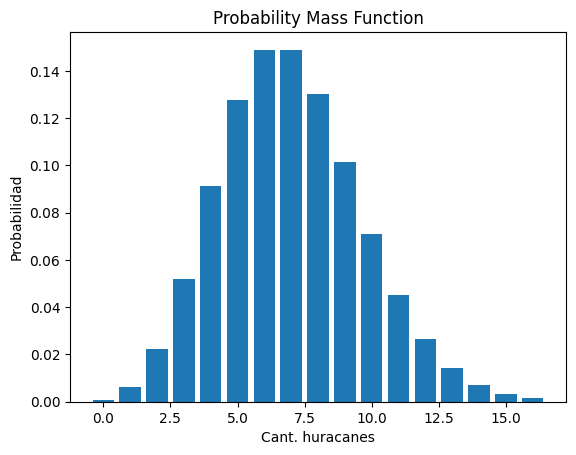

In [7]:
mu = 7
x = range(0, 17)

pmf = poisson.pmf(x, mu)

# Grafica
plt.bar(x, pmf)
plt.title('Probability Mass Function')
plt.xlabel('Cant. huracanes')
plt.ylabel('Probabilidad')
plt.show()

### Ejercicio 3
Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative
distribution function) de estos eventos.


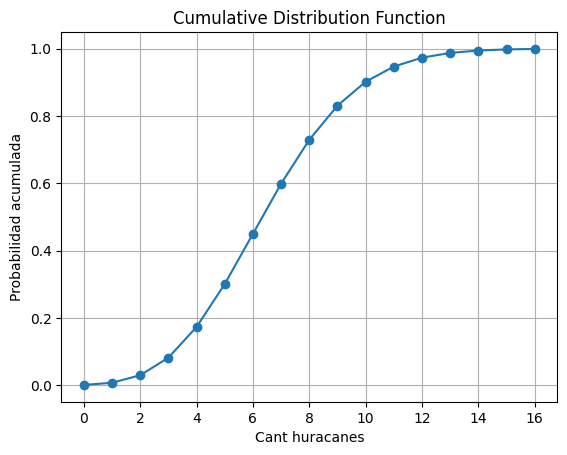

In [8]:
cdf = poisson.cdf(x, mu)

# Gráfica
plt.plot(x, cdf, marker='o')
plt.title('Cumulative Distribution Function')
plt.xlabel('Cant huracanes')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.show()

### Ejercicio 4
¿Qué conclusiones puede sacar al observar las gráficas de los ejecicios anteriores?

**Respuesta**

Como se puede observar en la primera gráfica la probabilidad más alta de cantidad de huracanes es 7; esto se debe a que este es el valor de la media de distribuciones, en donde se observa que al aljarnos de este la probabilidad de ocurrencia disminuye en ambas direcciones. Esto también se evidencia en la gráfica de CMP en donde los saltos más grandes entre probabilidad vs cantidad de huracanes se ven más grandes entre los puntos 5 y 8, indicando que existe una mayor probabilidad que ocurran de 5 a 8 huracanes por año.

## Task 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.

### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

#### Ejercicio 1
Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución de Poisson.

In [31]:
import numpy as np

def inversa(n, lambdaVal):
    X = np.zeros(n)
    for j in range(n):
        x = 0
        p = np.exp(-lambdaVal)
        s = p
        U = np.random.uniform()

        while U > s:
            x = x + 1
            p = (p*lambdaVal)/x
            s = s + p
        X[j] = x
    return X

#### Ejercicio 2
Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una
hora.

In [32]:
muestra = inversa(1000, 10)

#### Ejercicio 3
Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.

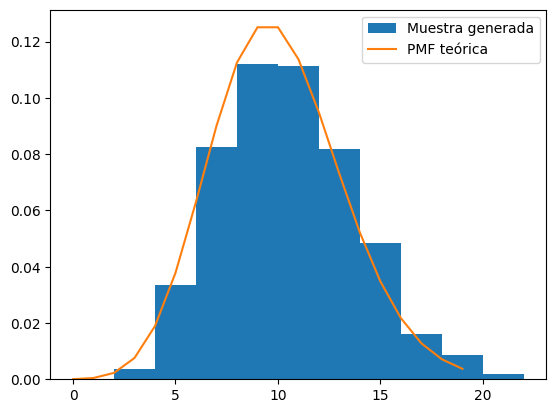

In [33]:
plt.hist(muestra, density=True, label="Muestra generada")
pmf = poisson.pmf(x, 10)
plt.plot(x, pmf, label="PMF teórica")
plt.legend()
plt.show()

#### Ejercicio 4
Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos.

In [34]:
print("MUESTRA GENERADA")
print('- Media:', np.mean(muestra))
print('- Varianza:', np.var(muestra))

print("\nVALORES TEÓRICOS")
print('- Media:', 10)
print('- Varianza', 10)


MUESTRA GENERADA
- Media: 10.039
- Varianza: 10.685478999999999

VALORES TEÓRICOS
- Media: 10
- Varianza 10


Como se puede observar los valores de la media y la varianza fueron bastante cercanos a los valores teóricos en donde hubo una mínima diferencia, lo cual demuestra que la implementación fue correcta.

### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrico.

### Ejercicio 1
Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte
de la distribución de Poisson.

In [60]:
lambd = 5

def pmf_geometric(k, p):
    return p * (1 - p) ** (k - 1)

C = []
for k in range (1,15):
  C.append( poisson.pmf(k, lambd) / pmf_geometric(k, 1/lambd) )

C = max(C)

In [65]:
def rechazo_poisson(x):
    muestra = []
    while len(muestra) < x:
        y = np.random.geometric(1.0/lambd)
        u = np.random.uniform(0, 1)
        if u <= poisson.pmf(y, lambd) / (C * pmf_geometric(y, 1.0/lambd)):
            muestra.append(y)
    return muestra

In [66]:
x = 1000
Muestra_negativa = rechazo_poisson(x)
k = np.arange(0, max(Muestra_negativa) + 1)
pmf = []
for i in k:
  temp = poisson.pmf(i, lambd)
  pmf.append(temp)

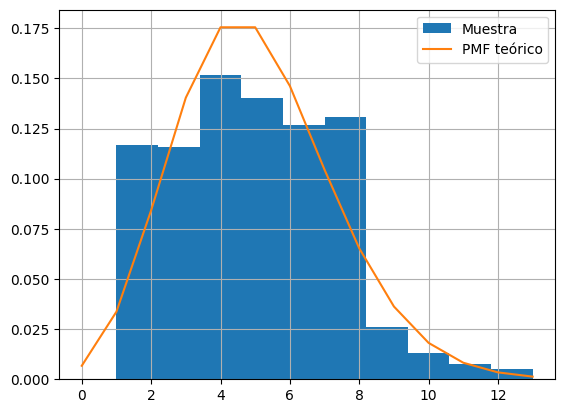

In [67]:
plt.hist(Muestra_negativa, density=True, label='Muestra')
plt.plot(k, pmf, label='PMF teórico')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
print("MUESTRA GENERADA")
print('- Media:', np.mean(Muestra_negativa))
print('- Varianza:', np.var(Muestra_negativa))

print("\nVALORES TEÓRICOS")
print('- Media:', 5)
print('- Varianza', 5)

MUESTRA GENERADA
- Media: 4.906
- Varianza: 4.9671639999999995

VALORES TEÓRICOS
- Media: 5
- Varianza 5


# Responda
 Compare los resultados de los dos métodos.
 1. **¿Qué método proporciona un mejor ajuste a la distribución de
Poisson objetivo?**
En este caso, ambos métodos proporcionaron resultados bastante cercanos a los teóricos. Sin embargo, el método de transofrmación inversa tiene un ajuste exacto dando una mayor precisión y efiencia.

2. **Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.**
- Método de Rechazo
  - Ventajas:
    - Su implementación es sencilla y bastante flexible.
    - No requiere un cálculo de la distribución acumulada.
  - Desventajas:
    - Es ineficiente pues requiere de bastantes iteraciones de una tasa de aceptación alta.
- Métodos de transformación Inversa
  - Ventajas:
    - Más eficiente.
    - Los resultados son precisos.
  - Desventajas:
    - Su implementación es más dificil pues requiere del cálculo de la función.

3. **Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes
distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?**
Al cambiar el valor lambda los resultados seguirían siendo bastante cercanos a los datos teóricos mas puede haber un problema de eficiencia especialmente en el método de rechazo por las razones previamente comentadas.
Por otro lado, si se utilizan distribuciones distintas se deben tomar en cuenta las distintas ventajas y desventajas de cada método para asegurar que se elija la opción más viable dependiendo de los recursos y conocimientos.
